In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 224
BATCH_SIZE = 20
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"Banana",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 800 files belonging to 2 classes.


In [4]:
class_names = dataset.class_names
class_names

['Banana_Healthy', 'Banana_Unhealthy']

In [5]:
len(dataset)

40

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(20, 224, 224, 3)
[1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1]


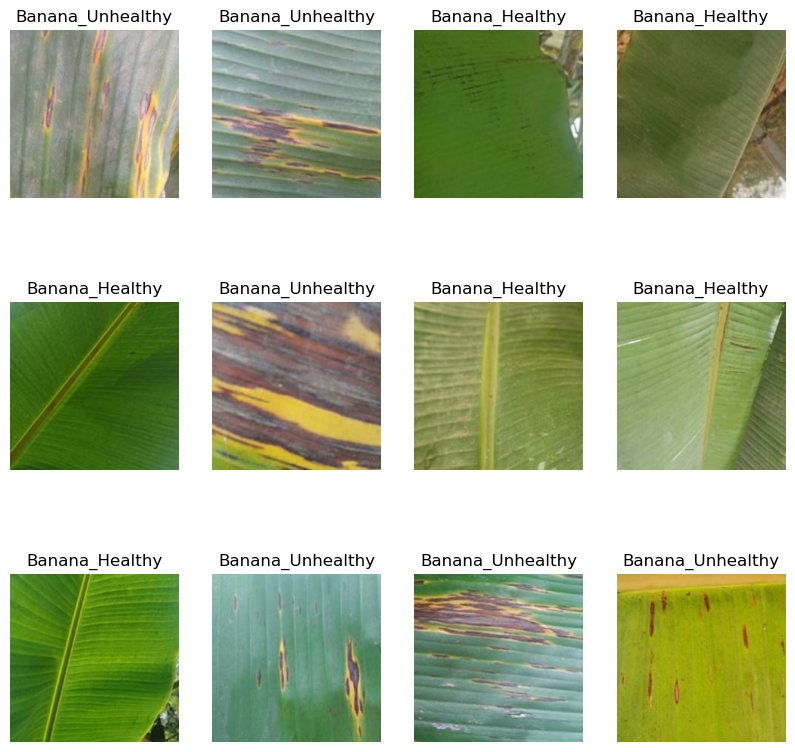

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [8]:
len(dataset)

40

In [9]:
80% ==> training
20% ==> 10% validation, 10% test

SyntaxError: invalid syntax (829920516.py, line 1)

In [10]:
train_size = 0.8
len(dataset)*train_size

32.0

In [11]:
train_ds = dataset.take(32)
len(train_ds)

32

In [12]:
test_ds = dataset.skip(32)
len(test_ds)

8

In [13]:
val_size = 0.1
len(dataset)*val_size

4.0

In [14]:
val_ds = test_ds.take(4)
len(val_ds)

4

In [15]:
test_ds = test_ds.skip(4)
len(test_ds)

4

In [16]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    val_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [17]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [18]:
len(train_ds)

32

In [19]:
len(val_ds)

4

In [20]:
len(test_ds)

4

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [23]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [24]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (20, 224, 224, 3)         0         
                                                                 
 sequential_1 (Sequential)   (20, 224, 224, 3)         0         
                                                                 
 conv2d (Conv2D)             (20, 222, 222, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (20, 111, 111, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (20, 109, 109, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (20, 54, 54, 64)          0         
 g2D)                                                 

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
32/32 [==============================] - 46s 1s/step - loss: 0.4327 - accuracy: 0.8391 - val_loss: 0.2877 - val_accuracy: 0.8750
Epoch 2/50
32/32 [==============================] - 34s 1s/step - loss: 0.2247 - accuracy: 0.9219 - val_loss: 0.1706 - val_accuracy: 0.9250
Epoch 3/50
32/32 [==============================] - 30s 938ms/step - loss: 0.1647 - accuracy: 0.9500 - val_loss: 0.1512 - val_accuracy: 0.9500
Epoch 4/50
32/32 [==============================] - 59s 2s/step - loss: 0.1551 - accuracy: 0.9422 - val_loss: 0.1733 - val_accuracy: 0.9250
Epoch 5/50
32/32 [==============================] - 66s 2s/step - loss: 0.1723 - accuracy: 0.9500 - val_loss: 0.2575 - val_accuracy: 0.9250
Epoch 6/50
32/32 [==============================] - 67s 2s/step - loss: 0.1084 - accuracy: 0.9656 - val_loss: 0.0815 - val_accuracy: 0.9625
Epoch 7/50
32/32 [==============================] - 68s 2s/step - loss: 0.1171 - accuracy: 0.9578 - val_loss: 0.0893 - val_accuracy: 0.9625
Epoch 8/50
32/32 

In [28]:
scores = model.evaluate(test_ds)

4/4 [==============================] - 12s 237ms/step - loss: 0.0192 - accuracy: 0.9875


In [29]:
scores

[0.019220706075429916, 0.987500011920929]

In [30]:
history

In [31]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 32}

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

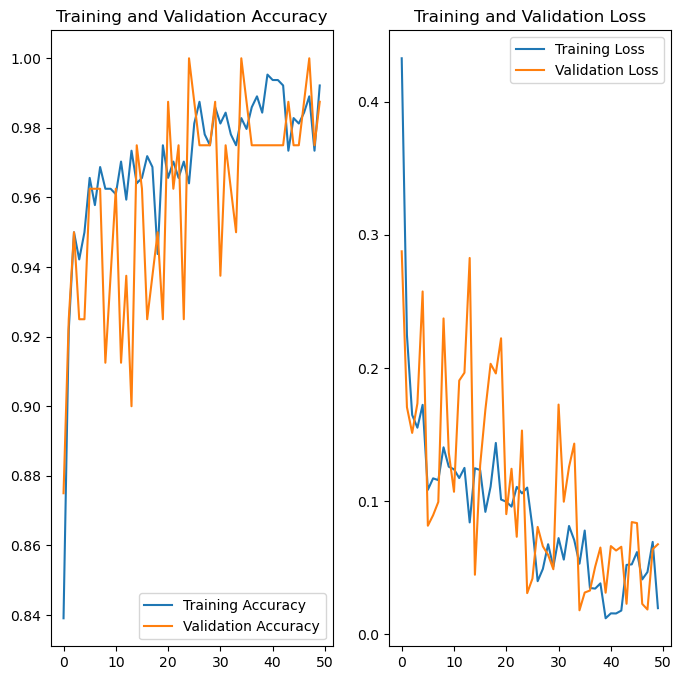

In [34]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
np.argmax([9.9986410e-01, 1.3590163e-04])

NameError: name 'np' is not defined

first image to predict
actual label: Banana_Unhealthy
1/1 [==============================] - 3s 3s/step
predicted label: Banana_Unhealthy


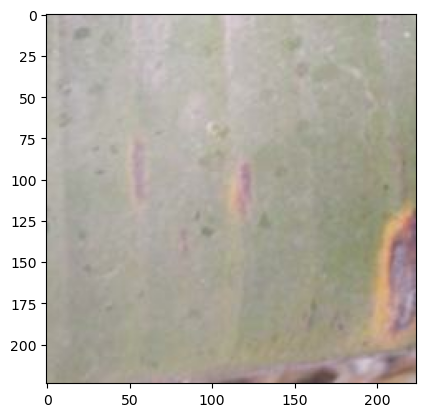

In [36]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    

In [37]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 61ms/step


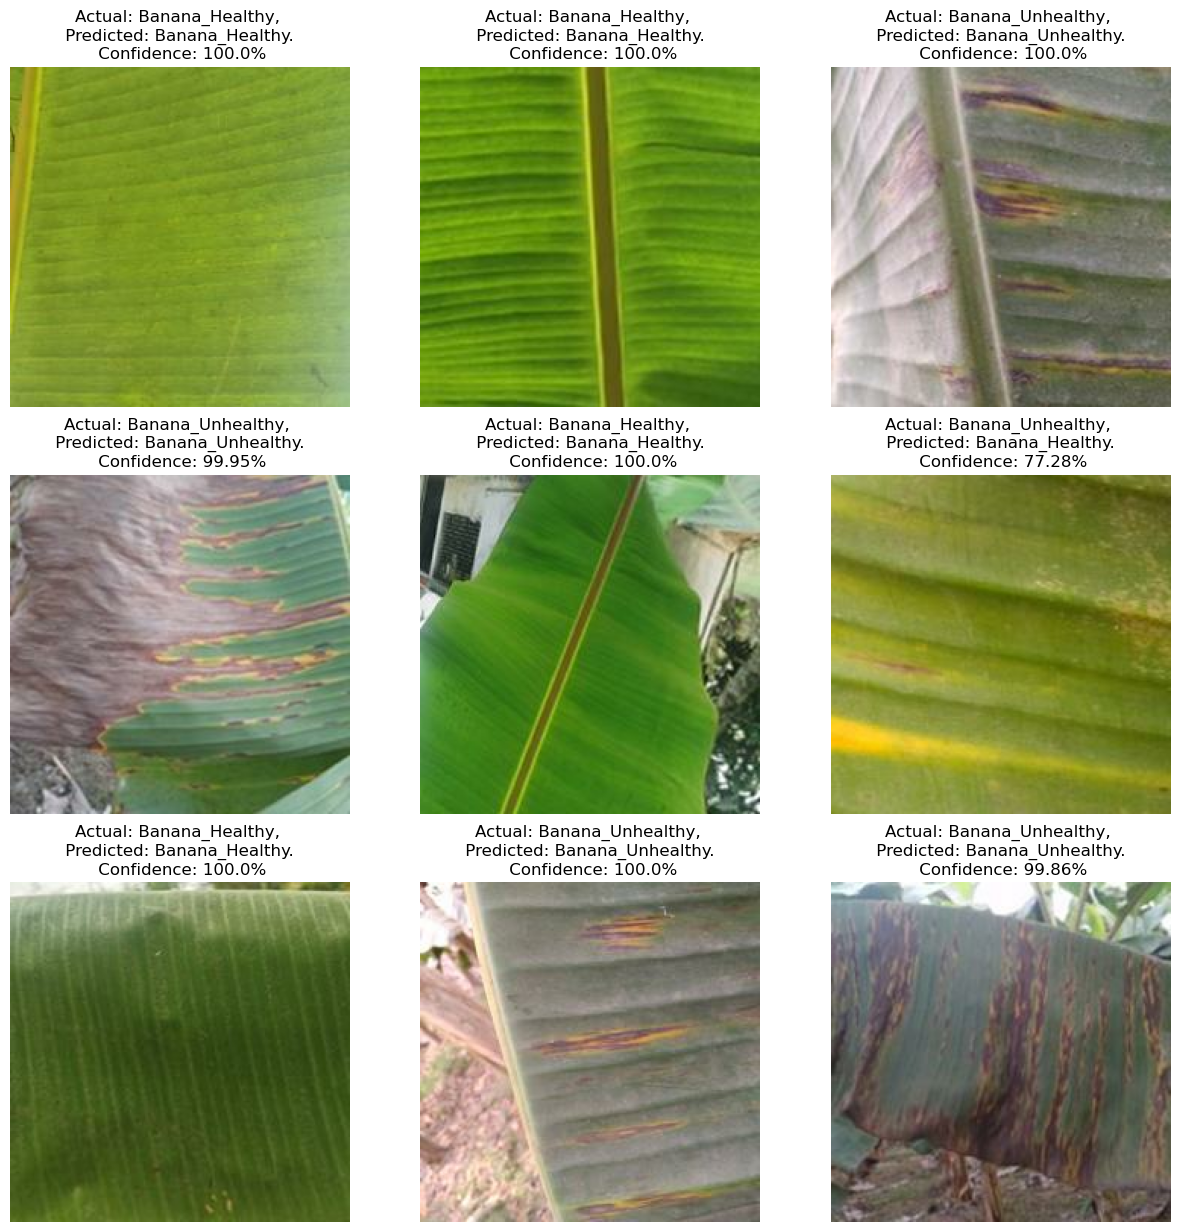

In [38]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}. \n Confidence: {confidence}%")
        
        plt.axis("off")

In [39]:
model_version = 1
model.save(f"../Models/{model_version}")

INFO:tensorflow:Assets written to: ../Models/1\assets


INFO:tensorflow:Assets written to: ../Models/1\assets


In [39]:
model_version = 1
model.save(f"../saved_models/{model_version}")

INFO:tensorflow:Assets written to: ../saved_models/1\assets


INFO:tensorflow:Assets written to: ../saved_models/1\assets


In [40]:
model_version = 2
model.save(f"../saved_models/{model_version}")

INFO:tensorflow:Assets written to: ../saved_models/2\assets


INFO:tensorflow:Assets written to: ../saved_models/2\assets


In [41]:
model_version = 3
model.save(f"../saved_models/{model_version}")

INFO:tensorflow:Assets written to: ../saved_models/3\assets


INFO:tensorflow:Assets written to: ../saved_models/3\assets
